# MNIST- handwritten digit recognition Part 2
In this modeule, we will talk about how we can further improve performance using various techniques.

## Batch Normalization
Do you remember we normalized input images such that they have zero mean? The training converges faster when images are normalized (zero mean and unit variance) and decorrelated. However, the parameter update during the training changes distributions in each layer, which is called *internal covariant shift*. Ioffe and Szegedy suggested [batch normalization](https://arxiv.org/abs/1502.03167) to normalize and decorrelate inputs to the mid-layers to resolve this issue and make the netwrok training converges faster. 

In [3]:
# Implement Batch Normalization
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

def BN_model():
### YOUR TURN
    # Create a model with 4 convolutional layers (2 repeating VGG stype units) and 2 dense layers before the output
    # Use Batch Normalization for every conv and dense layers
    # Use dropout layers if you like
    # Use Adam optimizer

    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# build the model
model = BN_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/home/geena/anaconda3/envs/DLK2/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., padding="same")`
/home/geena/anaconda3/envs/DLK2/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="valid")`
/home/geena/anaconda3/envs/DLK2/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/home/geena/anaconda3/envs/DLK2/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid")`
/home/geena/anaconda3/envs/DLK2/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.7452 - acc: 0.8461 - val_loss: 1.5372 - val_acc: 0.3711
Epoch 2/20
 - 7s - loss: 0.2888 - acc: 0.9606 - val_loss: 0.1765 - val_acc: 0.9791
Epoch 3/20
 - 7s - loss: 0.1845 - acc: 0.9727 - val_loss: 0.0981 - val_acc: 0.9851
Epoch 4/20
 - 6s - loss: 0.1343 - acc: 0.9778 - val_loss: 0.0578 - val_acc: 0.9911
Epoch 5/20
 - 6s - loss: 0.1067 - acc: 0.9809 - val_loss: 0.0457 - val_acc: 0.9916
Epoch 6/20
 - 7s - loss: 0.0886 - acc: 0.9825 - val_loss: 0.0352 - val_acc: 0.9933
Epoch 7/20
 - 7s - loss: 0.0785 - acc: 0.9837 - val_loss: 0.0335 - val_acc: 0.9921
Epoch 8/20
 - 7s - loss: 0.0677 - acc: 0.9855 - val_loss: 0.0271 - val_acc: 0.9935
Epoch 9/20
 - 6s - loss: 0.0615 - acc: 0.9857 - val_loss: 0.0271 - val_acc: 0.9931
Epoch 10/20
 - 6s - loss: 0.0559 - acc: 0.9867 - val_loss: 0.0323 - val_acc: 0.9918
Epoch 11/20
 - 7s - loss: 0.0526 - acc: 0.9872 - val_loss: 0.0222 - val_acc: 0.9943
Epoch 12/20
 - 7s - loss: 0.0492 - 

ValueError: Initializer for variable conv2d_58/kernel/ is from inside a control-flow construct, such as a loop or conditional. When creating a variable inside a loop or conditional, use a lambda as the initializer.

In [ ]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

From the above, can you get test error below 0.5%?

Where should you position the batch norm layer to implement the batch norm correctly?

Some people argue that they can get as good or better result by incorrectly implementing batchnorm such that the batchnorm comes after the activation layer. Test if this is true. What test wrror do you get?

In [4]:
# Implement Batch Normalization - after the activation 

def BNr_model():
### YOUR TURN
    # Using the same architecture above, 
    # except that the orders of a batchnormalization layer and a activation layer are reversed, 
    # build a model and test if the claim is true.
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, 3))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, 3))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.add(BatchNormalization())
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = BNr_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/home/geena/anaconda3/envs/DLK2/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 8.1715 - acc: 0.2016 - val_loss: 14.2655 - val_acc: 0.1135
Epoch 2/20
 - 7s - loss: 7.4650 - acc: 0.3047 - val_loss: 5.0392 - val_acc: 0.3372
Epoch 3/20
 - 7s - loss: 7.4470 - acc: 0.3395 - val_loss: 4.5302 - val_acc: 0.3971
Epoch 4/20
 - 6s - loss: 6.1028 - acc: 0.4352 - val_loss: 1.3446 - val_acc: 0.6706
Epoch 5/20
 - 6s - loss: 5.9311 - acc: 0.5417 - val_loss: 5.3076 - val_acc: 0.7533
Epoch 6/20
 - 7s - loss: 5.8100 - acc: 0.5760 - val_loss: 7.0441 - val_acc: 0.6629
Epoch 7/20
 - 7s - loss: 6.3815 - acc: 0.5728 - val_loss: 5.7877 - val_acc: 0.7258
Epoch 8/20
 - 7s - loss: 6.1155 - acc: 0.5208 - val_loss: 5.1006 - val_acc: 0.4144
Epoch 9/20
 - 6s - loss: 6.0601 - acc: 0.5000 - val_loss: 7.0653 - val_acc: 0.6586
Epoch 10/20
 - 6s - loss: 5.5521 - acc: 0.4878 - val_loss: 5.0332 - val_acc: 0.5436
Epoch 11/20
 - 7s - loss: 5.3127 - acc: 0.4740 - val_loss: 4.8354 - val_acc: 0.6476
Epoch 12/20
 - 7s - loss: 6.1612 -

### Recording loss and metric
The output of `model.fit` by default (in Keras 2) returns a dictionary of model history (also it can be called using the callback). The dictionary has keys loss and metric (when you specified the metric in the model.complie) for train and validation each. For our case here it would be: 'val_loss', 'val_acc', 'loss', 'acc'. A good use of such log is to monitor whether it's over fitting. When overfits, you will see the validation loss may go up at some point while train loss continues go down. Let's get rid of batch norm layers and run the model with higher running rate lr=0.01 and longer epoch (50) to see if it overfits (Answer: Yes it does, quite terribly).

In [9]:
import time
from keras.optimizers import Adam

def model_overfit():
### YOUR TURN
    # 1) Create a model with the same architecture above (4 convs and 2 denses before output) and hyperparameters, 
    # but without any batch normalization and dropouts.
    # 2) To make this overfit surely, let's change the learning rate of our Adam optimizer. Set the learning rate to 0.01.
    # 3) After running the training, plot the train and validation accuracy using the model output hisoty.
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(28, 28, 1)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    model.add(Conv2D(32, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(64))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    #model.add(BatchNormalization())
    model.add(Activation('softmax'))
    adam = Adam(lr=0.01)
    model.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])
    return model

# build the model
model = model_overfit()

# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 0.1785 - acc: 0.9425 - val_loss: 0.0720 - val_acc: 0.9780
Epoch 2/50
 - 3s - loss: 0.0578 - acc: 0.9826 - val_loss: 0.0429 - val_acc: 0.9873
Epoch 3/50
 - 3s - loss: 0.0458 - acc: 0.9870 - val_loss: 0.0442 - val_acc: 0.9863
Epoch 4/50
 - 3s - loss: 0.0364 - acc: 0.9894 - val_loss: 0.0489 - val_acc: 0.9857
Epoch 5/50
 - 3s - loss: 0.0446 - acc: 0.9870 - val_loss: 0.0577 - val_acc: 0.9847
Epoch 6/50
 - 3s - loss: 0.0439 - acc: 0.9879 - val_loss: 0.0566 - val_acc: 0.9848
Epoch 7/50
 - 3s - loss: 0.0429 - acc: 0.9881 - val_loss: 0.0511 - val_acc: 0.9866
Epoch 8/50
 - 3s - loss: 0.0332 - acc: 0.9913 - val_loss: 0.0553 - val_acc: 0.9861
Epoch 9/50
 - 3s - loss: 0.0496 - acc: 0.9871 - val_loss: 0.0473 - val_acc: 0.9890
Epoch 10/50
 - 3s - loss: 0.0455 - acc: 0.9885 - val_loss: 0.0562 - val_acc: 0.9867
Epoch 11/50
 - 3s - loss: 0.0425 - acc: 0.9891 - val_loss: 0.0579 - val_acc: 0.9887
Epoch 12/50
 - 3s - loss: 0.0351 - 

In [10]:
log.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

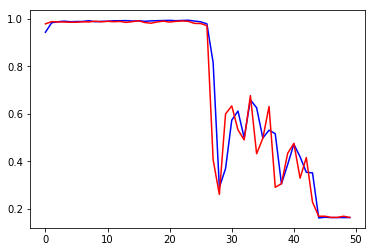

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log.history['acc'],'b') 
plt.plot(log.history['val_acc'],'r')
plt.show()

**Note**: The case above is a quite drastic case because we deliberately made the model overfit by having high learning rate and longer epoch as well as removing removing batch norm and dropout layers. Note that the plot is of accuracy not loss. If you like, you may save the log.history (It's a dictionary) using pickle: https://wiki.python.org/moin/UsingPickle

#### Tune Learning rate
Without inserting batchnorm or dropout again, decrease learning rate and run for 50 epochs, plot the accuracy from train and validation. What is the highest learning rate that it doesn't overfit? What is the validation accuracy as a result?

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 16s - loss: 0.2670 - acc: 0.9245 - val_loss: 0.0595 - val_acc: 0.9808
Epoch 2/50
 - 3s - loss: 0.0580 - acc: 0.9820 - val_loss: 0.0442 - val_acc: 0.9861
Epoch 3/50
 - 3s - loss: 0.0402 - acc: 0.9877 - val_loss: 0.0330 - val_acc: 0.9885
Epoch 4/50
 - 3s - loss: 0.0305 - acc: 0.9907 - val_loss: 0.0306 - val_acc: 0.9905
Epoch 5/50
 - 3s - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0395 - val_acc: 0.9886
Epoch 6/50
 - 3s - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0263 - val_acc: 0.9913
Epoch 7/50
 - 3s - loss: 0.0166 - acc: 0.9947 - val_loss: 0.0257 - val_acc: 0.9916
Epoch 8/50
 - 3s - loss: 0.0144 - acc: 0.9953 - val_loss: 0.0329 - val_acc: 0.9903
Epoch 9/50
 - 3s - loss: 0.0129 - acc: 0.9957 - val_loss: 0.0355 - val_acc: 0.9875
Epoch 10/50
 - 3s - loss: 0.0104 - acc: 0.9966 - val_loss: 0.0335 - val_acc: 0.9905
Epoch 11/50
 - 3s - loss: 0.0101 - acc: 0.9968 - val_loss: 0.0250 - val_acc: 0.9929
Epoch 12/50
 - 3s - loss: 0.0099 -

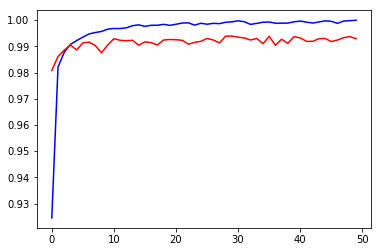

In [2]:
#Your code here
import time
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

def model_overfit2(lr):
    # create model
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(28, 28, 1)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    model.add(Conv2D(32, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(64))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    #model.add(BatchNormalization())
    model.add(Activation('softmax'))
    adam = Adam(lr=lr)
    model.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])
    return model

# build the model
model = model_overfit2(0.001)

# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log.history['acc'],'b') 
plt.plot(log.history['val_acc'],'r')
plt.show()

lr= 0.01 149.53998827934265  seconds
CNN Error: 88.65%


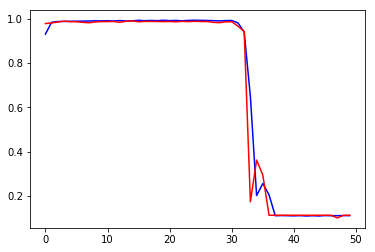

lr= 0.001 149.2069857120514  seconds
CNN Error: 0.63%


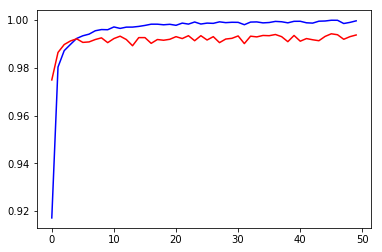

lr= 0.0001 151.68174767494202  seconds
CNN Error: 1.19%


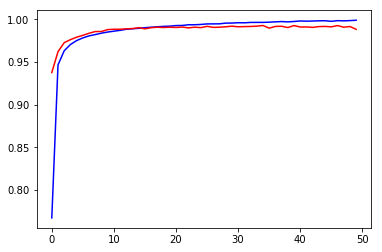

lr= 1e-05 151.98022484779358  seconds
CNN Error: 2.12%


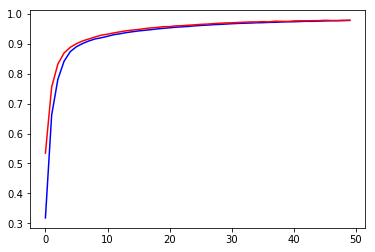

In [4]:
for lr in [0.01,0.001,0.0001,0.00001]:
    # build the model
    model = model_overfit2(lr)

    # Fit the model
    t0=time.time()
    log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=0)
    t1=time.time()
    print('lr=',lr, t1-t0," seconds")

    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))

    plt.plot(log.history['acc'],'b') 
    plt.plot(log.history['val_acc'],'r')
    plt.show()

#### Add Dropout
Now, add dropouts and run with the same hyperparameters (learning rate, epochs) you found from above. Time the model.fit() using `time.time`. 
1) Does it take longer training time by adding dropouts?
2) For the same epoch, is your final validation accuracy better? If not better and you're sure it's not overfitting yet, try to increase either your learning rate or epoch, OR change your dropout rate(s). Record your optimum values. 

In [5]:
#Your code here
def model_overfit3(lr, do=[0.2,0.2,0.5]):
    # create model
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(28, 28, 1)))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(do[0]))
    model.add(Conv2D(32, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(do[1]))
    model.add(Flatten())
    model.add(Dense(256))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(do[2]))
    model.add(Dense(64))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    #model.add(BatchNormalization())
    model.add(Activation('softmax'))
    adam = Adam(lr=lr)
    model.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])
    return model

DO= [0.2, 0.2, 0.2] 162.1905915737152  seconds
CNN Error: 0.52%


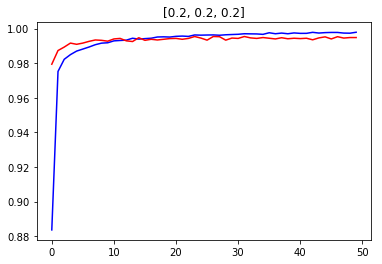

DO= [0.2, 0.2, 0.5] 165.19598960876465  seconds
CNN Error: 0.49%


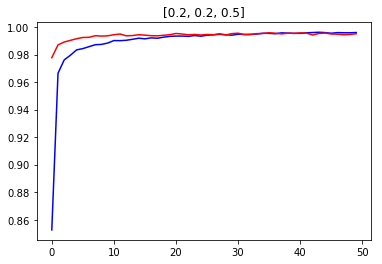

DO= [0.5, 0.2, 0.2] 168.3765845298767  seconds
CNN Error: 0.60%


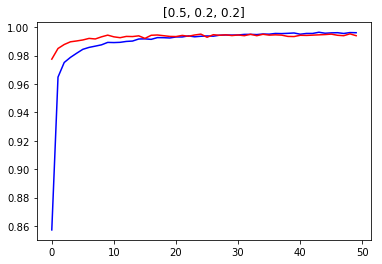

DO= [0.2, 0.5, 0.5] 168.59041142463684  seconds
CNN Error: 0.52%


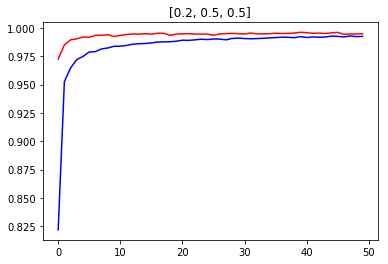

DO= [0.5, 0.5, 0.5] 171.5627920627594  seconds
CNN Error: 0.45%


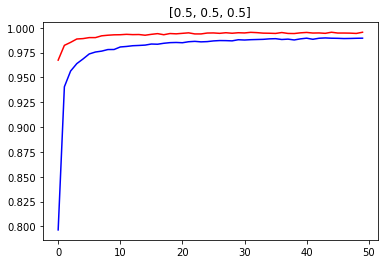

In [7]:
for do in [[0.2,0.2,0.2],[0.2,0.2,0.5],[0.5,0.2,0.2],[0.2,0.5,0.5],[0.5,0.5,0.5]]:
    # build the model
    model = model_overfit3(0.001,do)

    # Fit the model
    t0=time.time()
    log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=0)
    t1=time.time()
    print('DO=',do, t1-t0," seconds")

    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))

    plt.plot(log.history['acc'],'b') 
    plt.plot(log.history['val_acc'],'r')
    plt.title(str(do))
    plt.show()

Seems my best configuration is do=[0.5,0.5,0.5]. I didn't find a monotonous increase in performance as I increase the drop rate.
Also it seems it takes slightly longer when I have dropouts.

#### Add Batch Normalization
Now, get rid of dropouts and add batch normalization layers. Choose learning rate between 0.01 and 0.001. Find the largest learning rate that still does not overfit but gives highest accuracy.
Time model.fit() using `time.time`. 
Plot the 'acc' and 'val_acc'
Compare the learning rate with those from Exercise 1 and 2. What do you find?

In [8]:
#Your code here
def model_overfit4(lr):
    # create model
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(do[0]))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(do[1]))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(do[2]))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    adam = Adam(lr=lr)
    model.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ])
    return model

lr= 0.001 311.59489393234253  seconds
CNN Error: 0.53%


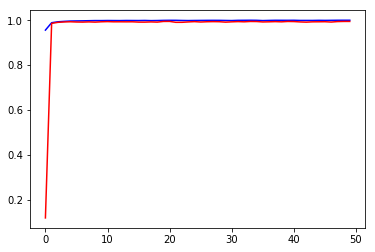

lr= 0.002 312.6454677581787  seconds
CNN Error: 0.57%


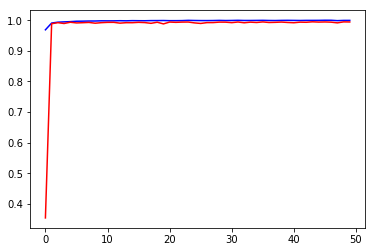

lr= 0.005 313.1084077358246  seconds
CNN Error: 0.84%


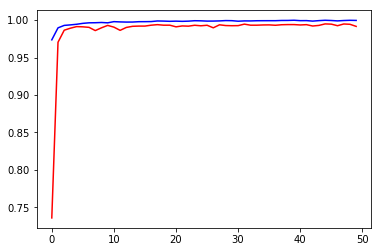

lr= 0.01 315.221652507782  seconds
CNN Error: 0.59%


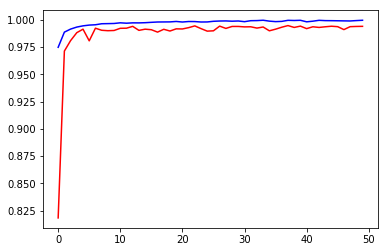

lr= 0.02 312.84303879737854  seconds
CNN Error: 0.63%


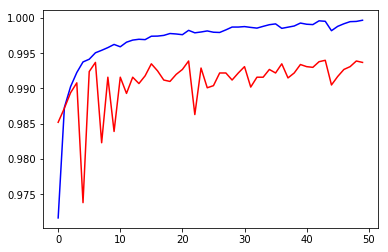

lr= 0.05 314.9346454143524  seconds
CNN Error: 0.78%


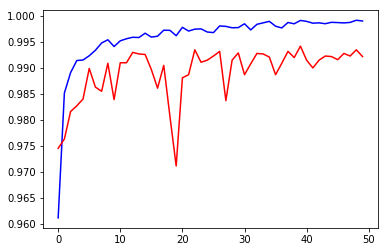

lr= 0.1 314.8227732181549  seconds
CNN Error: 0.89%


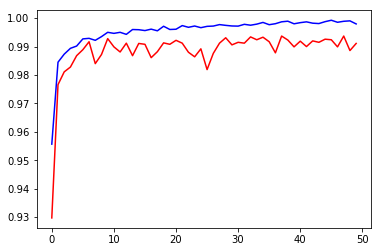

In [9]:
for lr in [0.001,0.002,0.005,0.01,0.02, 0.05, 0.1]:
    # build the model
    model = model_overfit4(lr)

    # Fit the model
    t0=time.time()
    log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=0)
    t1=time.time()
    print('lr=',lr, t1-t0," seconds")

    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))

    plt.plot(log.history['acc'],'b') 
    plt.plot(log.history['val_acc'],'r')
    plt.show()

Although not the optimal results, training at high learning rates still converge when BN is applied.

### Quiz.

#### 1. 
What are the advantages of a CNN over a fully connected ANN for image classificaion?

CNN has shared weights (filters) that are applied to the input feature map, not like ANN which needs parameters for every pixels combinations between the input and output feature maps. Therefore CNN is computationally more efficient and is less likely to overfit.

#### 2. 
Consider a CNN composed of 3 convolutional layers, each with 3x3 kernels, a stride of 2, and with 'same' padding. The first layer outputs a featuremap with 100 cahnnels, the second layer outputs a featuremap with 200 depth, and the last outputs one with 400 depth. The input is color (RGB) images of 200x300 pixels. What is the total number of parameters for this CNN model?

conv1 weights on the input: (3x3x3+1)x100 = 2800
conv2 weights on the output of conv1: (3x3x100+1)x200 = 180200
conv3 weights on the output of conv2: (3x3x200+1)x400 = 720400
total: 2800+180200+720400 = 903400

#### 3.
If your GPU runs out of memory while you train a CNN model, what can you do resolving the issue? List at least 3 ways to avoid the problem.

You can try these things:
1) Reduce the minibatch size
2) Reduce spatial dimension by using pooling or strides
3) Remove one or more layers
4) Reduce the number of filters to make your featuremap depth smaller
5) Reduce the featuremap depth using 1x1 convolutions
6) Distribute the model to multigpu 